In [1]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import psycopg2 as pg

In [2]:
engine = pg.connect("dbname='postgres' user='postgres' host='database-final.cjdbapst3wjf.us-east-1.rds.amazonaws.com' port='5432' password='FinalProject05'")
Contributions = pd.read_sql('select * from merged_2013', con=engine)
Contributions.head()
Contributions.dropna()

,election,candidateid,candidatename,date,contributiontype,city,state,zipcode,amount,matchamt,prevamt,totalamount,expenditure_amount,purposecode,purpose
0,2013,1752,"Abiodun,Laurel-Smith",2013-09-07,Corporation,New York,NY,10001,0.0,0.0,0.0,0.0,54,Office Expenses,Office Expenses
1,2013,260,"William,Thompson, Jr.",2012-01-17,Corporation,New York,NY,10019,0.0,0.0,0.0,0.0,19,Other,Other: explntion
2,2013,FI,"John,Liu",2013-07-12,Limited Liability Company,Flushing,NY,11355,0.0,0.0,0.0,0.0,110,Office Expenses,Office Expenses
3,2013,FI,"John,Liu",2013-04-15,Limited Liability Company,Flushing,NY,11355,0.0,0.0,0.0,0.0,250,Fundraising,Fundraising
4,2013,260,"William,Thompson, Jr.",2013-07-08,Limited Liability Company,New York,NY,10018,0.0,0.0,0.0,0.0,57,Other,Other: explntion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,2013,FI,"John,Liu",2012-03-23,Other,New York,NY,10036,0.0,0.0,0.0,0.0,17861,Professional Services,Prof. Srvcs.
13165,2013,FI,"John,Liu",2012-04-11,Other,New York,NY,10036,0.0,0.0,0.0,0.0,23053,Professional Services,Prof. Srvcs.
13166,2013,FI,"John,Liu",2012-05-03,Other,New York,NY,10036,0.0,0.0,0.0,0.0,14896,Professional Services,Prof. Srvcs.
13167,2013,FI,"John,Liu",2013-01-02,Other,New York,NY,10036,0.0,0.0,0.0,0.0,50000,Professional Services,Prof. Srvcs.


In [3]:
Contributions_df = Contributions.drop(columns=['election','prevamt'])
total_groupby = Contributions_df.groupby(['candidatename']).sum(['totalamount']).sort_values('totalamount',ascending=False)
Contributions_df['zipcode'] = Contributions_df['zipcode'].apply(str)

In [8]:
Contributions_df = Contributions_df.groupby(['zipcode','date','contributiontype','city','state']).sum('totalamount').sort_values('totalamount',ascending=False)

In [9]:
Contributions_df.head()

amount  matchamt  \
zipcode date       contributiontype city     state                      
10065   2013-05-10 Individual       New York NY     36725.0     950.0   
10003   2013-07-11 Individual       New York NY      9150.0      50.0   
10011   2013-07-11 Individual       New York NY     12660.0      25.0   
10021   2013-01-10 Individual       New York NY     26075.0    1500.0   
        2013-07-11 Individual       New York NY     13575.0     200.0   

                                                    totalamount  \
zipcode date       contributiontype city     state                
10065   2013-05-10 Individual       New York NY         42925.0   
10003   2013-07-11 Individual       New York NY         34800.0   
10011   2013-07-11 Individual       New York NY         33685.0   
10021   2013-01-10 Individual       New York NY         33675.0   
        2013-07-11 Individual       New York NY         33260.0   

                                                    expenditure_amount  
zipcode date       contributiontype city     state                      
10065   2013-05-10 Individual       New York NY                      0  
10003   2013-07-11 Individual       New York NY                      4  
10011   2013-07-11 Individual       New York NY                      0  
10021   2013-01-10 Individual       New York NY                      0  
        2013-07-11 Individual       New York NY                      0

In [10]:
Contributions_df = Contributions_df.reset_index()
Contributions_df

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,10065,2013-05-10,Individual,New York,NY,36725.00,950.0,42925.000000,0
1,10003,2013-07-11,Individual,New York,NY,9150.00,50.0,34800.000000,4
2,10011,2013-07-11,Individual,New York,NY,12660.00,25.0,33685.000000,0
3,10021,2013-01-10,Individual,New York,NY,26075.00,1500.0,33675.000000,0
4,10021,2013-07-11,Individual,New York,NY,13575.00,200.0,33260.000000,0
...,...,...,...,...,...,...,...,...,...
29469,10467,2007-06-18,Limited Liability Company,Bronx,NY,-4950.00,0.0,-4950.000000,0
29470,11740,2007-01-10,Individual,Greenlawn,NY,-4950.00,0.0,-4950.000000,0
29471,11229,2007-11-07,Individual,Brooklyn,NY,-7900.00,0.0,-7900.000000,0
29472,10023,2011-04-11,Individual,New York,NY,-9052.68,0.0,-9052.680176,0


In [26]:
from sklearn.preprocessing import LabelEncoder
Contributions_df_enc = Contributions_df.copy()
le = LabelEncoder()
Contributions_df_enc['date'] = le.fit_transform(Contributions_df['date'])
Contributions_df_enc['contributiontype'] = le.fit_transform(Contributions_df['contributiontype'])
Contributions_df_enc['city'] = le.fit_transform(Contributions_df['city'])
Contributions_df_enc['state'] = le.fit_transform(Contributions_df['state'])
Contributions_df_enc['zipcode'] = le.fit_transform(Contributions_df['zipcode'])
Contributions_df_enc = Contributions_df_enc.drop(['zipcode'],axis=1)
Contributions_df_enc.head()

,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,1222,5,1224,51,36725.0,950.0,42925.0,0
1,1284,5,1224,51,9150.0,50.0,34800.0,4
2,1284,5,1224,51,12660.0,25.0,33685.0,0
3,1102,5,1224,51,26075.0,1500.0,33675.0,0
4,1284,5,1224,51,13575.0,200.0,33260.0,0


In [27]:
X = Contributions_df_enc.drop('totalamount',axis = 1)
y = Contributions_df_enc['totalamount']
Contributions_df_enc.nunique()

date                  1451
contributiontype        12
city                  2024
state                   92
amount                 919
matchamt               286
totalamount           1274
expenditure_amount    2281
dtype: int64

In [28]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=79)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [30]:
regr = RandomForestRegressor()

In [31]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
y_pred = regr.predict(X_test)
print(len(y_pred))

8843


In [33]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

0.827154497027456


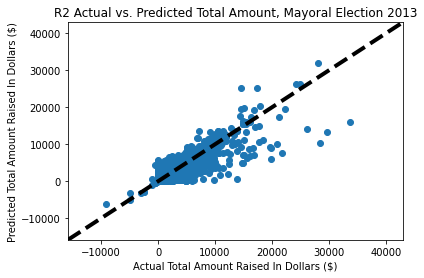

In [34]:
# %matplotlib inline
print(r_squared)
plt.scatter(y_test,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Total Amount Raised In Dollars ($)')
plt.ylabel('Predicted Total Amount Raised In Dollars ($)')
plt.title('R2 Actual vs. Predicted Total Amount, Mayoral Election 2013')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.savefig('../ResourcesPredicted_Total_Amount_Regression_2013.png')

In [21]:
pred_df = X_test
pred_df['Predicted Total Amount'] = y_pred

/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
pred_df.isnull().sum()

zipcode                   0
date                      0
contributiontype          0
city                      0
state                     0
amount                    0
matchamt                  0
expenditure_amount        0
Predicted Total Amount    0
dtype: int64

In [23]:
pred_graph = pred_df.groupby('zipcode').sum('redicted Total Amount').sort_values(by=['Predicted Total Amount'],ascending=True)

In [24]:
# pred_graph = pred_graph.reset_index()
pred_graph

,date,contributiontype,city,state,amount,matchamt,expenditure_amount,Predicted Total Amount
zipcode,,,,,,,,
1017,1166,10,1356,102,-4650.00,0.0,0,-5745.500000
1,1403,4,1583,61,0.00,0.0,1281,0.000000
1481,1311,4,1722,34,0.00,0.0,54000,0.000000
2298,867,4,893,7,0.00,0.0,152,0.000000
1366,1247,4,1386,60,0.00,0.0,10000,0.000000
...,...,...,...,...,...,...,...,...
608,105941,529,128520,5355,158235.00,19708.0,87402,221367.934506
561,112388,636,149328,6222,187026.37,24083.0,23582,282924.540794
559,87293,510,123624,5151,224129.00,18645.0,63988,307633.421009


In [25]:
pred_graph.to_csv('../Resources/Predicted_Amounts.csv',index=False)